# Test1:
## Initialize an NxN matrix

In [ ]:
n = 5
board = zeros(Int8, n+2, n+2)
A = zeros(Int8, n+2, n+2)
board[3,2] = 1
board[3,3] = 1
board[3,4] = 1
for i in 2:n+1
    for j in 2:n+1
        A[i,j] = board[i+1,j] + board[i+1,j+1] + board[i,j+1] + board[i-1,j] + board[i-1,j-1] + board[i,j-1] + board[i+1,j-1] + board[i-1,j+1]
    end
end
board

## define a logic function

In [4]:
function livesOrDies(alive, liveNeighbors)
    if alive == 1
        if ((liveNeighbors > 3) | (liveNeighbors < 2))
            return 0
        end
    elseif liveNeighbors == 3
        return 1
    end
    return alive
end

livesOrDies (generic function with 1 method)

## start the game with a loop

In [20]:
#we'll do 6 iterations to start
for x in 1:6
    for i in 2:n+1
        for j in 2:n+1
            A[i,j] = board[i+1,j] + board[i+1,j+1] + board[i,j+1] + board[i-1,j] + board[i-1,j-1] + board[i,j-1] + board[i+1,j-1] + board[i-1,j+1]
        end
    end
    for i in 2:n+1
        for j in 2:n+1
            board[i,j] = livesOrDies(board[i,j], A[i,j])
        end
    end
    display(board)
end

7×7 Matrix{Int8}:
 0  0  0  0  0  0  0
 0  0  1  0  0  0  0
 0  0  1  0  0  0  0
 0  0  1  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0

7×7 Matrix{Int8}:
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  1  1  1  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0

7×7 Matrix{Int8}:
 0  0  0  0  0  0  0
 0  0  1  0  0  0  0
 0  0  1  0  0  0  0
 0  0  1  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0

7×7 Matrix{Int8}:
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  1  1  1  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0

7×7 Matrix{Int8}:
 0  0  0  0  0  0  0
 0  0  1  0  0  0  0
 0  0  1  0  0  0  0
 0  0  1  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0

7×7 Matrix{Int8}:
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  1  1  1  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0

# Test 2

## Make a function for updating the "live neighbors" matrix

In [6]:
function updateNeighbors(N, M, A, B)
    for i in 2:N+1
        for j in 2:M+1
            B[i,j] = A[i+1,j] + A[i+1,j+1] + A[i,j+1] + A[i-1,j] + A[i-1,j-1] + A[i,j-1] + A[i+1,j-1] + A[i-1,j+1]
        end
    end
end

updateNeighbors (generic function with 1 method)

## Make initializing into a function

In [22]:
function initGame(N, M)
    A = zeros(Int8, N+2, M+2)
    B = zeros(Int8, N+2, M+2)
    A[2:n+1, 2:n+1] = rand((0,1), N, M)
    #updateNeighbors(N, M, A, B)
    return A, B
end

initGame (generic function with 1 method)

## Run the Game

[ Info: Saved animation to c:\Users\thore\Documents\GitHub\MA2600_group_code\Group Project 1\GOF.gif


Plots.AnimatedGif("c:\\Users\\thore\\Documents\\GitHub\\MA2600_group_code\\Group Project 1\\GOF.gif")
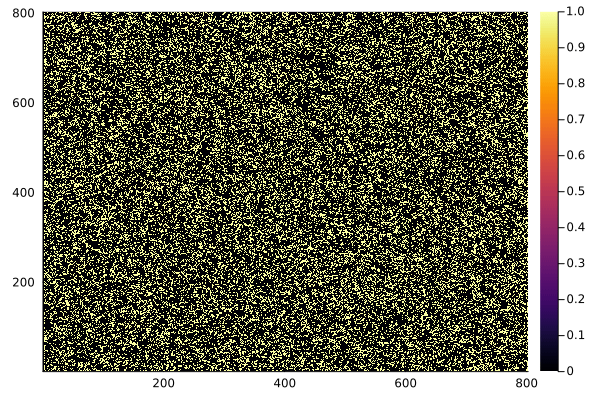

In [36]:
#import Pkg
#Pkg.add("Plots")
using Plots

n = 800
runs = 20
board, liveNeighbors = initGame(n, n)
anim = @animate for r in 1:runs
    updateNeighbors(n, n, board, liveNeighbors)
    for i in 2:n+1
        for j in 2:n+1
            board[i,j] = livesOrDies(board[i,j], liveNeighbors[i,j])
        end
    end
    heatmap(board)
end
gif(anim, "GOF.gif", fps= 2)
#heatmap(board)